In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [18]:
import os
os.sys.path.append('../')

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use('CMS')

In [36]:
pd.set_option("display.max_columns", None)

In [20]:
# importing custom files

In [52]:
import pv_utils

In [53]:
path = "/mnt/storage/lborgna/track/"
filename = path + "01.root"

In [54]:
trk = pv_utils.load_data(filename, data_type="track")

In [55]:
trk.head()

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0   trk_chi2  \
entry subentry                                                              
0     0         3.294195  0.672711 -0.235986   999.0 -7.207031   3.886195   
      1         3.299082  0.070255 -0.303737   999.0  5.800781   3.457583   
      2         4.282707  1.931356 -0.272299   999.0 -7.558594   2.652499   
      3         2.730331 -1.494013 -0.168791   999.0  0.000000   3.931520   
      4         2.346045  1.780082  0.038812   999.0  0.117188  25.375839   

                trk_bendchi2  trk_nstub  trk_lhits  trk_dhits  trk_seed  \
entry subentry                                                            
0     0             0.565463          6     111111          0         0   
      1             1.158106          6     111111          0         0   
      2             1.138293          6         11       1111         0   
      3             0.562027          5        111        110         0   
      4             0.787909          6         11      10111         0   

                trk_genuine  trk_loose  trk_unknown  trk_combinatoric  \
entry subentry                                                          
0     0                   1          1            0                 0   
      1                   1          1            0                 0   
      2                   1          1            0                 0   
      3                   1          1            0                 0   
      4                   1          1            0                 0   

                trk_fake  trk_matchtp_pdgid  trk_matchtp_pt  trk_matchtp_eta  \
entry subentry                                                                 
0     0                2                211        3.307104         0.678369   
      1                2               -211        3.333383         0.069476   
      2                2               -211        4.196679         1.933154   
      3                2                211        2.740556        -1.497854   
      4                2               2212        2.332434         1.780198   

                trk_matchtp_phi  trk_matchtp_z0  trk_matchtp_dxy  trk_injet  \
entry subentry                                                                
0     0               -0.236771       -7.436831         0.001133          0   
      1               -0.302832        5.946478         0.000195          0   
      2               -0.270587       -7.436831         0.001133          0   
      3               -0.169511        0.002524         0.000285          0   
      4                0.041637        0.094147         0.001353          0   

                trk_injet_highpt  trk_injet_vhighpt  
entry subentry                                       
0     0                        0                  0  
      1                        0                  0  
      2                        0                  0  
      3                        0                  0  
      4                        0                  0

In [56]:
tp = pv_utils.load_data(filename, data_type="truth")

In [78]:
tp.shape

(4466300, 43)

In [81]:
tp_dropnan = tp.loc[~tp['tp_z0'].isna()].copy()

In [83]:
tp_dropnan.shape

(4464400, 43)

In [57]:
tp.head()

tp_pt    tp_eta    tp_phi   tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                
0     0         100.300301 -0.898876  0.061430  0.00125  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.00125  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.00125  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.00125  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.00125  0.001264  3.499881   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   

                matchtrk_z0  matchtrk_d0  matchtrk_chi2  matchtrk_bendchi2  \
entry subentry                                                               
0     0            3.574219       -999.0       7.661629           0.025519   
      1            3.750000       -999.0       8.667765           1.376251   
      2            3.574219       -999.0       4.947954           1.358919   
      3            3.574219       -999.0       3.709781           0.449784   
      4            3.457031       -999.0      18.657181           0.499871   

                matchtrk_nstub  matchtrk_lhits  matchtrk_dhits  matchtrk_seed  \
entry subentry                                                                  
0     0                      6          111111               0              0   
      1                      6              11            1111              0   
      2                      6          111111               0              0   
      3                      5          111011               0              0   
      4                      6              11            1111              0   

                matchtrk_injet  matchtrk_injet_highpt  matchtrk_injet_vhighpt  \
entry subentry                                                                  
0     0                      1                      1                       0   
      1                      0                      0                       0   
      2                      0                      0                       0   
      3                      1                      0                       0   
      4                      1                      0                       0   

                loosematchtrk_pt  loosematchtrk_eta  loosematchtrk_phi  \
entry subentry                                                       

# Test 1: DBSCAN ON TRUTH DATA

In [91]:
from pv_utils import run_dbscan, truth_pv_z0

In [58]:
z0_gen = truth_pv_z0(tp)

In [84]:
z0_gen_nonan = truth_pv_z0(tp_dropnan)

In [87]:
z0_gen_nonan

entry
0        3.499750
1        0.338214
2       -2.649157
3        1.543104
4        2.421834
           ...   
25195    1.910414
25196   -2.066012
25197   -2.285170
25198   -4.809160
25199    0.305602
Name: tp_z0, Length: 25200, dtype: float32

In [92]:
z0_dbscan = run_dbscan(tp_dropnan, z0_column='tp_z0', pt_column='tp_pt')

In [93]:
z0_dbscan.shape

(25200, 3)

In [94]:
from pv_utils import primary_vertex_efficiency

In [101]:
primary_vertex_efficiency(z0_gen=z0_gen_nonan, z0_reco=z0_dbscan['z0'],delta=0.1)

98.01587301587301

In [102]:
from pv_utils import plot_pv_efficiency_z0

In [104]:
bin_edges = np.arange(-10, 10+0.5, 0.5)

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


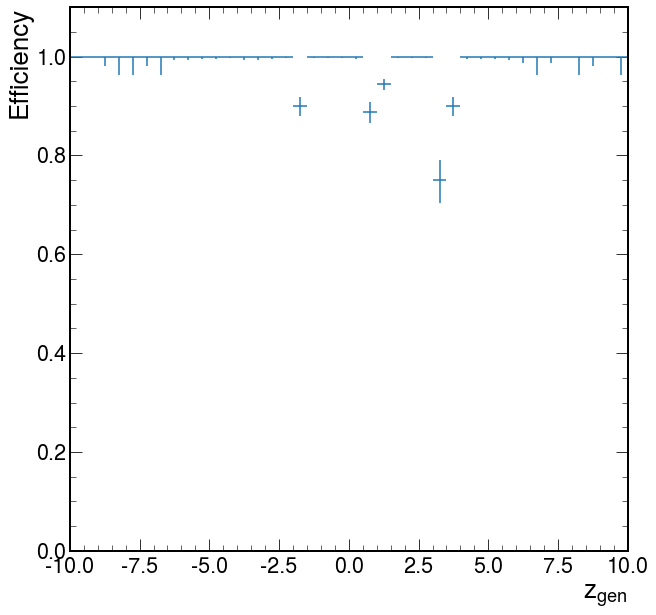

In [151]:
results_tp = plot_pv_efficiency_z0(z0_gen=z0_gen_nonan, z0_reco = z0_dbscan['z0'], bin_edges=bin_edges)

# Test 2: DBSCAN on trk data

In [134]:
trk.trk_z0.isna().value_counts()

False    4641213
Name: trk_z0, dtype: int64

In [135]:
z0_dbscan_trk = run_dbscan(trk, z0_column='trk_z0', pt_column='trk_pt')

In [137]:
primary_vertex_efficiency(z0_gen=z0_gen_nonan, z0_reco=z0_dbscan_trk['z0'],delta=0.1)

74.57539682539682

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


Text(0.5, 1.0, 'DBSCAN PV efficiency 25k events')

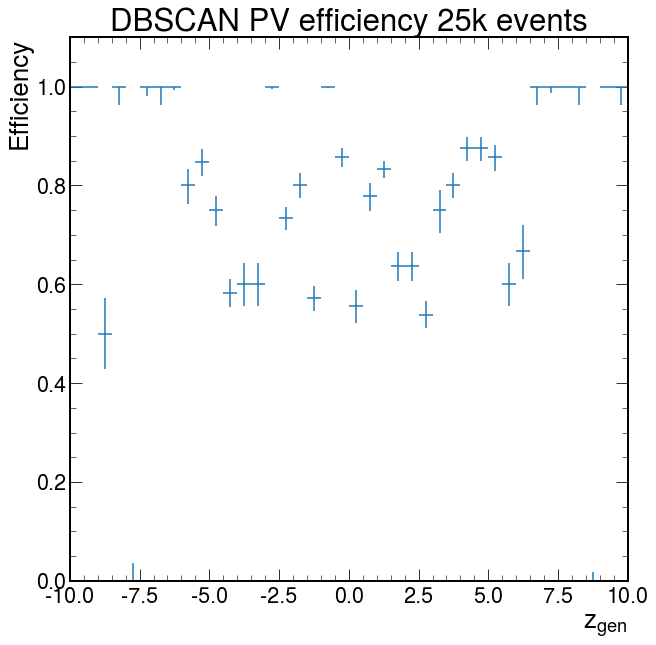

In [162]:
results_trk = plot_pv_efficiency_z0(z0_gen=z0_gen_nonan, z0_reco = z0_dbscan_trk['z0'], bin_edges=bin_edges)
plt.title('DBSCAN PV efficiency 25k events')

# Test 3: run on "matchtp" variables

In [149]:
z0_dbscan_matched = run_dbscan(trk, z0_column='trk_matchtp_z0', pt_column='trk_matchtp_pt')

In [150]:
primary_vertex_efficiency(z0_gen=z0_gen_nonan, z0_reco=z0_dbscan_matched['z0'],delta=0.1)

86.90476190476191

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


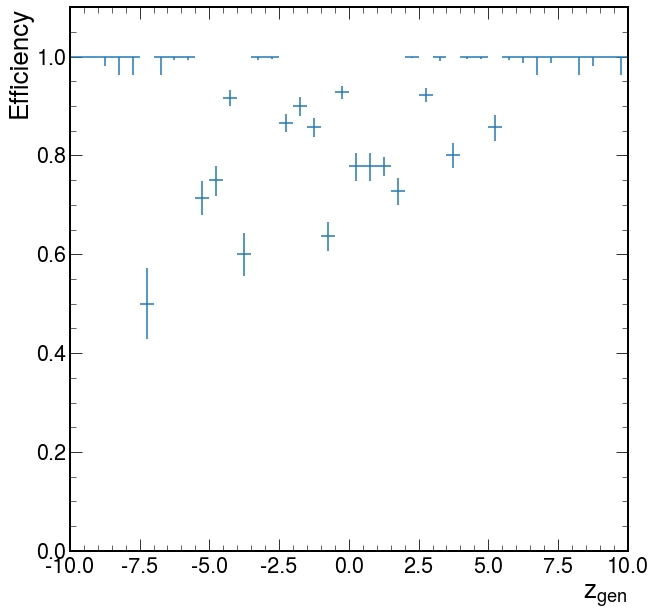

In [153]:
results_matched = plot_pv_efficiency_z0(z0_gen=z0_gen_nonan, z0_reco = z0_dbscan_matched['z0'], bin_edges=bin_edges)

# Test 4: FastHisto

In [154]:
from pv_utils import run_fast_histo

In [155]:
help(run_fast_histo)

Help on function run_fast_histo in module pv_utils:

run_fast_histo(df: pandas.core.frame.DataFrame, bin_edges: <built-in function array>, z0_column: str = 'trk_z0', pt_column: str = 'trk_pt') -> pandas.core.frame.DataFrame
    Runs fast histo on all of the available events



In [156]:
bin_edges_fasthisto = np.arange(-15, 15+0.25, 0.25)

In [157]:
z0_fasthisto = run_fast_histo(tp_dropnan, bin_edges_fasthisto, z0_column='tp_z0', pt_column='tp_pt')

In [159]:
primary_vertex_efficiency(z0_gen=z0_gen_nonan, z0_reco=z0_fasthisto,delta=0.1)

98.80952380952381

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


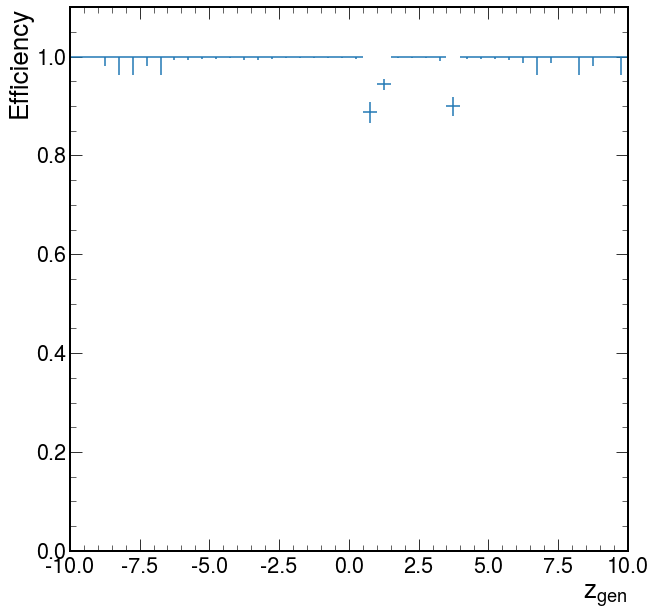

In [160]:
results_fh = plot_pv_efficiency_z0(z0_gen=z0_gen_nonan, z0_reco = z0_fasthisto, bin_edges=bin_edges)

# Test 5: FastHisto 

In [ ]:
z0_fasthisto_trk = run_fast_histo(trk, bin_edges_fasthisto, z0_column='tp_z0', pt_column='tp_pt')

In [139]:
trk.columns

Index(['trk_pt', 'trk_eta', 'trk_phi', 'trk_d0', 'trk_z0', 'trk_chi2',
       'trk_bendchi2', 'trk_nstub', 'trk_lhits', 'trk_dhits', 'trk_seed',
       'trk_genuine', 'trk_loose', 'trk_unknown', 'trk_combinatoric',
       'trk_fake', 'trk_matchtp_pdgid', 'trk_matchtp_pt', 'trk_matchtp_eta',
       'trk_matchtp_phi', 'trk_matchtp_z0', 'trk_matchtp_dxy', 'trk_injet',
       'trk_injet_highpt', 'trk_injet_vhighpt'],
      dtype='object')

In [141]:
trk['trk_matchtp_z0'].isna().value_counts()

False    4641213
Name: trk_matchtp_z0, dtype: int64

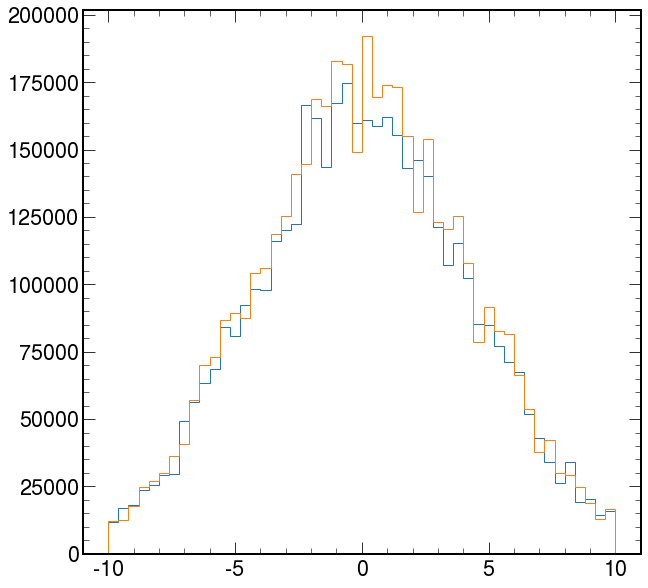

In [144]:
_, be, _ = plt.hist(trk['trk_matchtp_z0'].values, bins = 50, histtype='step', range=(-10, 10))
_ = plt.hist(trk['trk_z0'].values, bins = be, histtype='step',range=(-10, 10))

In [145]:
trk['trk_matchtp_z0'].describe()

count    4.641213e+06
mean    -1.332212e+01
std      1.153082e+02
min     -9.990000e+02
25%     -3.143168e+00
50%     -1.057615e-01
75%      2.970273e+00
max      1.549847e+02
Name: trk_matchtp_z0, dtype: float64

In [148]:
trk.loc[(trk['trk_z0']>10)&(trk['trk_z0'] < 10.1)]

trk_pt   trk_eta   trk_phi  trk_d0     trk_z0   trk_chi2  \
entry subentry                                                               
11    21        2.006480  2.043237  0.104434   999.0  10.078125  10.296511   
      22        1.999983  1.993254  0.455806   999.0  10.019531  10.835955   
      43        3.330709 -1.887757  1.448388   999.0  10.078125  14.628025   
      135       2.334714  0.145965 -2.581963   999.0  10.078125   4.861978   
      145       2.291879 -0.914134 -2.449330   999.0  10.078125  18.352554   
...                  ...       ...       ...     ...        ...        ...   
25176 138       4.336157 -1.094308 -1.804464   999.0  10.078125   3.824520   
25181 148       2.089439  2.038246  2.818535   999.0  10.078125   1.093341   
25187 211       2.719645  0.145965 -0.918260   999.0  10.078125  10.781939   
      218       2.719645  0.145965 -0.918260   999.0  10.078125  10.782125   
25193 74        2.403872  0.326215  1.748144   999.0  10.078125  28.359215   

                trk_bendchi2  trk_nstub  trk_lhits  trk_dhits  trk_seed  \
entry subentry                                                            
11    21            0.790728          6          1      11111         5   
      22            0.832137          6          1      11111         5   
      43            1.046127          6         11       1111         0   
      135           1.037479          6     111111          0         0   
      145           0.572183          6     111111          0         0   
...                      ...        ...        ...        ...       ...   
25176 138           0.852943          5      11111          0         0   
25181 148           1.929283          5          1       1111         5   
25187 211           0.558708          6     111111          0         0   
      218           0.558708          6     111111          0         0   
25193 74            4.265714          4      11011          0         0   

                trk_genuine  trk_loose  trk_unknown  trk_combinatoric  \
entry subentry                                                          
11    21                  1          1            0                 0   
      22                  1          1            0                 0   
      43                  1          1            0                 0   
      135                 1          1            0                 0   
      145                 1          1            0                 0   
...                     ...        ...          ...               ...   
25176 138                 1          1            0                 0   
25181 148                 1          1            0                 0   
25187 211                 1          1            0                 0   
      218                 1          1            0                 0   
25193 74                  0          0            0                 1   

                trk_fake  trk_matchtp_pdgid  trk_matchtp_pt  trk_matchtp_eta  \
entry subentry                                                                 
11    21               2               -211        2.004240         2.039741   
      22               2                211        2.054786         1.996096   
      43               2               -211        3.185647        -1.888668   
      135              2                211        2.318505         0.146766   
      145              2               -321        2.311083        -0.914422   
...                  ...                ...             ...              ...   
25176 138              2               -211        4.311342        -1.095460   
25181 148              2                211        2.065644         2.035889   
25187 211              2                211        2.738648         0.144883   
      218              2                211        2.738648         0.144883   
25193 74               0               -999     -999.000000      -999.000000   

                trk_matchtp_phi  trk

In [147]:
trk.loc[trk['trk_matchtp_z0']>150]

,,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_chi2,trk_bendchi2,trk_nstub,trk_lhits,trk_dhits,trk_seed,trk_genuine,trk_loose,trk_unknown,trk_combinatoric,trk_fake,trk_matchtp_pdgid,trk_matchtp_pt,trk_matchtp_eta,trk_matchtp_phi,trk_matchtp_z0,trk_matchtp_dxy,trk_injet,trk_injet_highpt,trk_injet_vhighpt
entry,subentry,,,,,,,,,,,,,,,,,,,,,,,,,
42,161,3.484145,2.252490,-0.595380,999.0,8.671875,9.084188,0.689129,4,0,1111,5,0,1,0,0,2,-11,3.707225,2.257461,-0.694913,152.671814,30.604090,0,0,0
245,208,2.053548,2.075588,-0.932606,999.0,7.558594,10.143068,0.513013,4,0,11101,5,0,1,0,0,2,-13,1.714601,2.054754,-1.120252,154.984741,37.258957,0,0,0
294,161,3.484145,2.252490,-0.595380,999.0,8.671875,9.084188,0.689129,4,0,1111,5,0,1,0,0,2,-11,3.707225,2.257461,-0.694913,152.671814,30.604090,0,0,0
497,208,2.053548,2.075588,-0.932606,999.0,7.558594,10.143068,0.513013,4,0,11101,5,0,1,0,0,2,-13,1.714601,2.054754,-1.120252,154.984741,37.258957,0,0,0
546,161,3.484145,2.252490,-0.595380,999.0,8.671875,9.084188,0.689129,4,0,1111,5,0,1,0,0,2,-11,3.707225,2.257461,-0.694913,152.671814,30.604090,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24689,208,2.053548,2.075588,-0.932606,999.0,7.558594,10.143068,0.513013,4,0,11101,5,0,1,0,0,2,-13,1.714601,2.054754,-1.120252,154.984741,37.258957,0,0,0
24738,161,3.484145,2.252490,-0.595380,999.0,8.671875,9.084188,0.689129,4,0,1111,5,0,1,0,0,2,-11,3.707225,2.257461,-0.694913,152.671814,30.604090,0,0,0
24941,208,2.053548,2.075588,-0.932606,999.0,7.558594,10.143068,0.513013,4,0,11101,5,0,1,0,0,2,-13,1.714601,2.054754,-1.120252,154.984741,37.258957,0,0,0


In [146]:
trk['trk_z0'].describe()

count    4.641213e+06
mean     4.592044e-03
std      4.311324e+00
min     -1.476562e+01
25%     -2.812500e+00
50%      0.000000e+00
75%      2.871094e+00
max      1.494141e+01
Name: trk_z0, dtype: float64

# Debugging NaNs

In [63]:
!ls -lh /mnt/storage/lborgna/track/t

total 42G
-rw-r--r-- 1 lborgna users 493M Nov 10 15:34 00.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:34 01.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:35 02.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:35 03.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:36 04.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:36 05.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:37 06.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:37 07.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:38 08.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:38 09.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:40 10.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:41 11.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:42 12.root
-rw-r--r-- 1 lborgna users 483M Nov 10 15:43 13.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:44 14.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:45 16.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:46 17.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:47 18.root
-rw-r--r-- 1 lborgna users 498M Nov 

In [67]:
tp_01 = pd.read_pickle('/mnt/storage/lborgna/track/tp_01.pkl')

In [68]:
trk_01 = pd.read_pickle('/mnt/storage/lborgna/track/trk_01.pkl')

In [71]:
tp_01.shape

(4466300, 4)

In [76]:
tp.loc[tp.tp_z0.isna()]

,,tp_pt,tp_eta,tp_phi,tp_dxy,tp_d0,tp_z0,tp_d0_prod,tp_z0_prod,tp_pdgid,tp_nmatch,tp_nloosematch,tp_nstub,tp_eventid,tp_charge,tp_injet,tp_injet_highpt,tp_injet_vhighpt,matchtrk_pt,matchtrk_eta,matchtrk_phi,matchtrk_z0,matchtrk_d0,matchtrk_chi2,matchtrk_bendchi2,matchtrk_nstub,matchtrk_lhits,matchtrk_dhits,matchtrk_seed,matchtrk_injet,matchtrk_injet_highpt,matchtrk_injet_vhighpt,loosematchtrk_pt,loosematchtrk_eta,loosematchtrk_phi,loosematchtrk_z0,loosematchtrk_d0,loosematchtrk_chi2,loosematchtrk_bendchi2,loosematchtrk_nstub,loosematchtrk_seed,loosematchtrk_injet,loosematchtrk_injet_highpt,loosematchtrk_injet_vhighpt
entry,subentry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,178,2.533679,2.055791,-2.511117,0.000922,NaN,NaN,0.000647,-1.139875,3122,0,0,10,227,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
19,39,2.212508,-2.459547,-2.374141,0.001119,NaN,NaN,-0.000320,-0.795490,130,0,0,5,73,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
30,110,3.697674,-1.745928,0.121713,0.000306,NaN,NaN,0.000306,-1.359417,-2112,0,0,9,118,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
68,76,2.218122,-1.017487,1.645551,0.000627,NaN,NaN,-0.000567,3.747072,-2112,0,0,7,106,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
101,53,2.293721,-0.742602,2.464364,0.001085,NaN,NaN,0.000394,8.333951,-2112,0,0,7,52,0,1,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25164,101,3.597035,0.125056,-0.666859,0.001222,NaN,NaN,-0.001222,-3.786474,2112,0,0,8,105,0,1,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
25169,72,2.008664,-2.052806,-3.109528,0.001424,NaN,NaN,-0.000500,-0.580002,130,0,0,5,67,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0
25179,55,2.039575,0.355476,0.874802,4.090869,NaN,NaN,-0.006495,1.866280,-2112,0,0,4,14,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999,-999,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,0,0,0


In [75]:
tp_01.loc[tp_01.tp_z0.isna()]

,,tp_pt,tp_z0,tp_d0,tp_eventid
entry,subentry,,,,
2,178,2.533679,NaN,NaN,227
19,39,2.212508,NaN,NaN,73
30,110,3.697674,NaN,NaN,118
68,76,2.218122,NaN,NaN,106
101,53,2.293721,NaN,NaN,52
...,...,...,...,...,...
25164,101,3.597035,NaN,NaN,105
25169,72,2.008664,NaN,NaN,67
25179,55,2.039575,NaN,NaN,14
